# Introduction

    Cannabis, also known as marijuana among other names,[n 1] is a psychoactive drug from the Cannabis plant intended for  medical or recreational use. The main psychoactive part of cannabis is tetrahydrocannabinol (THC); one of 483 known compounds in the plant, including at least 65 other cannabinoids. Cannabis can be used by smoking, vaporizing, within food, or as an extract.

    Cannabis is often used for its mental and physical effects, such as a "high" or "stoned" feeling, a general change in perception, euphoria (heightened mood), and an increase in appetite.Onset of effects is within minutes when smoked, and about 30 to 60 minutes when cooked and eaten.They last for between two and six hours. Short-term side effects may include a decrease in short-term memory, dry mouth, impaired motor skills, red eyes, and feelings of paranoia or anxiety. Long-term side effects may include addiction, decreased mental ability in those who started as teenagers, and behavioral problems in children whose mothers used cannabis during pregnancy. Studies have found a strong relation between cannabis use and the risk of psychosis,though the cause-and-effect relationship is debated.

# Understanding Data

    Are the Species distribuition of our dataset equal?

    The all types of strains have the same rating distribuition?

    Whats the first word in description to each species? 

    Are the Flavor important to the rating ?

    Are the Effect important to the rating? 

    Are some difference in Effects and Flavors related by specie? 

# Librarys and import


In [1]:
%matplotlib inline
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
plt.style.use('ggplot')

import seaborn as sns # for making plots with seaborn
color = sns.color_palette()
sns.set(rc={'figure.figsize':(25,15)})

import plotly
# connected=True means it will download the latest version of plotly javascript library.
plotly.offline.init_notebook_mode(connected=True)
import plotly.graph_objs as go

import plotly.figure_factory as ff
import cufflinks as cf


import warnings
warnings.filterwarnings('ignore')

plt.style.use('ggplot') # to plot graphs with gggplot2 style

In [2]:
strains = pd.read_csv('cannabis.csv')
pd.set_option('display.max_rows',None)
pd.set_option('display.max_columns',None)

# Knowning the Data

In [3]:
strains.isnull().sum()

Strain          0
Type            0
Rating          0
Effects         0
Flavor         46
Description    33
dtype: int64

In [4]:
strains

Strain    Type  Rating  \
0                             100-Og  hybrid     4.0   
1                     98-White-Widow  hybrid     4.7   
2                               1024  sativa     4.4   
3                           13-Dawgs  hybrid     4.2   
4                           24K-Gold  hybrid     4.6   
5                         3-Bears-Og  indica     0.0   
6                            3-Kings  hybrid     4.4   
7                             303-Og  indica     4.2   
8                             3D-Cbd  sativa     4.6   
9                           3X-Crazy  indica     4.4   
10            3Rd-Coast-Panama-Chunk  hybrid     4.7   
11                          501St-Og  hybrid     4.5   
12                       5Th-Element  indica     4.4   
13                      707-Headband  hybrid     4.3   
14                       8-Ball-Kush  indica     4.3   
15                            818-Og  indica     4.7   
16                            831-Og  indica     5.0   
17                    9-Pound-Hammer  indica     4.5   
18                          91-Krypt  indica     4.7   
19                              A-10  indica     3.8   
20                             A-Dub  hybrid     4.4   
21                           A-Train  hybrid     4.1   
22                              Acdc  hybrid     4.5   
23                             Ak-47  hybrid     4.2   
24                             Ak-48  hybrid     4.0   
25                          Aberdeen  hybrid     4.3   
26                        Abusive-Og  indica     4.5   
27                     Acapulco-Gold  sativa     4.5   
28                     Ace-Killer-Og  indica     4.8   
29                     Ace-Of-Spades  indica     4.1   
30                              Aceh  sativa     4.4   
31                              Acid  hybrid     4.4   
32                        Acid-Dough  sativa     5.0   
33                           Afcrack  hybrid     3.4   
34                    Afghan-Big-Bud  indica     4.0   
35                        Afghan-Cow  sativa     4.3   
36                     Afghan-Diesel  hybrid     3.7   
37                   Afghan-Hawaiian  indica     4.1   
38                       Afghan-Haze  hybrid     4.3   
39                       Afghan-Kush  indica     4.1   
40                      Afghan-Skunk  indica     4.3   
41                  Afghan-Sour-Kush  indica     4.5   
42                      Afghan-Widow  hybrid     4.5   
43                           Afghani  indica     4.3   
44                 Afgahni-Bullrider  indica     4.4   
45                       Afghani-Cbd  indica     4.6   
46                         Afghanica  hybrid     4.1   
47                        Afghanimal  indica     5.0   
48                          Afghooey  indica     4.1   
49                             Afgoo  indica     4.1   
50                           Afgooey  indica     4.3   
51                       Afkansastan  indica     3.8   
52                             Afpak  hybrid     4.2   
53                           African  sativa     3.9   
54                         Afrikaner  sativa     0.0   
55                 Afternoon-Delight  hybrid     4.8   
56                           Afwreck  hybrid     4.2   
57                      Agent-Orange  hybrid     4.2   
58                      Agent-Tangie  hybrid     4.5   
59                     Air-Jordan-Og  indica     4.5   
60                         Als-Dream  hybrid     3.0   
61                            Alaska  sativa     4.6   
62              Alaska-Thunder-Grape  hybrid     5.0   
63                       Alaskan-Ice  sativa     4.4   
64              Alaskan-Thunder-Fuck  sativa     4.4   
65                     Albert-Walker  hybrid     4.7   
66                           Alchemy  hybrid     4.8   
67                               Alf  hybrid     5.0   
68               Alice-In-Wonderland  sativa     4.5   
69                   Alien-Abduction  hybrid     3.8   
70                  Alien-Apparition  hybrid     4.0  

In [5]:
type(strains['Flavor'].iloc[103]) #NaN

float

In [6]:
type(strains['Flavor'].iloc[106]) #None

str

In [7]:
len(strains[strains['Flavor'].isnull() == True])

46

In [8]:
len(strains[strains['Effects'].isnull() == True])

0

In [9]:
len(strains[strains['Description'].isnull() == True])

33

In [10]:
len(strains[strains['Effects'] == 'None'])

87

In [11]:
len(strains[strains['Flavor'] == 'None'])

110

In [12]:
len(strains[strains['Description'] == 'None'])

4

In [13]:
strains.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2351 entries, 0 to 2350
Data columns (total 6 columns):
Strain         2351 non-null object
Type           2351 non-null object
Rating         2351 non-null float64
Effects        2351 non-null object
Flavor         2305 non-null object
Description    2318 non-null object
dtypes: float64(1), object(5)
memory usage: 110.3+ KB


In [14]:
strains.describe()

Rating
count  2351.000000
mean      4.310634
std       0.836394
min       0.000000
25%       4.200000
50%       4.400000
75%       4.700000
max       5.000000

In [15]:
dfDescribe=pd.DataFrame(columns='dataFeatures dataType null nullPct unique uniqueSample'.split(),
                        data=[[col, strains.dtypes[col], sum(strains[col].isna()),round(100*sum(strains[col].isna())/len(strains[col]),2),strains[col].nunique(),list(strains[col].unique()[:2])]for col in strains.columns])
                                                                  
dfDescribe

dataFeatures dataType  null  nullPct  unique  \
0       Strain   object     0     0.00    2350   
1         Type   object     0     0.00       3   
2       Rating  float64     0     0.00      26   
3      Effects   object     0     0.00    1655   
4       Flavor   object    46     1.96    1293   
5  Description   object    33     1.40    2312   

                                        uniqueSample  
0                           [100-Og, 98-White-Widow]  
1                                   [hybrid, sativa]  
2                                         [4.0, 4.7]  
3  [Creative,Energetic,Tingly,Euphoric,Relaxed, R...  
4       [Earthy,Sweet,Citrus, Flowery,Violet,Diesel]  
5  [$100 OG is a 50/50 hybrid strain that packs a...

In [16]:
total = strains.isnull().sum().sort_values(ascending=False)
percent = (strains.isnull().sum()/strains.isnull().count().sort_values(ascending=False))
missing_data = pd.concat([total, percent], axis=1, keys=('Total Percent').split())
missing_data

Total   Percent
Description     33  0.014037
Effects          0  0.000000
Flavor          46  0.019566
Rating           0  0.000000
Strain           0  0.000000
Type             0  0.000000

In [17]:
strains = strains.fillna(value='None')

# Data Exploration

In [18]:
# print("Numerical describe of distribution Type")
# print(strains.groupby("Type")["Strain"].count())
# print("Percentage of distribution Type ")
# print((strains.groupby("Type")["Strain"].count() / len(strains.Type) * 100).round(decimals=2))

# plt.figure(figsize=(10,6))
# sns.countplot(x="Type", data=strains, palette='rainbow')
# plt.xlabel('Species', fontsize=15)
# plt.ylabel('Count', fontsize=20)
# plt.title("Cannabis Species Count ", fontsize=20)
# plt.show()


app_category = strains['Type'].value_counts().sort_values(ascending=True)

data = [go.Pie(
        labels = app_category.index,
        values = app_category.values,
        hoverinfo = 'label+value'
    
)]

layout = go.Layout(
                   title='Type Distribution'
                   )

fig = go.Figure(data=data, layout=layout)

plotly.offline.iplot(fig, filename='Type Distribution')

In [19]:
app_category = strains['Rating'].value_counts().sort_values(ascending=True)

data = [go.Pie(
        labels = app_category.index,
        values = app_category.values,
        hoverinfo = 'label+value'
        
    
)]

layout = go.Layout(
                   title='Rating Distribution'
                   )

fig = go.Figure(data=data, layout=layout)

plotly.offline.iplot(fig, filename='Rating Distribution')

Top 10 Rating by consumers
4.5    317
4.3    297
4.4    284
4.6    242
4.2    225
5.0    210
4.7    164
4.8    159
4.0    104
4.1    101
Name: Rating, dtype: int64


Text(0.5,0,'Rating')

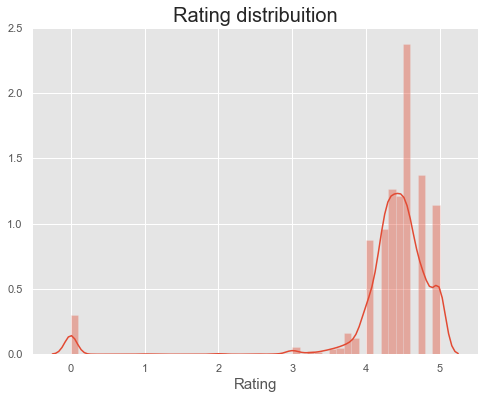

In [20]:
print("Top 10 Rating by consumers")
print(strains["Rating"].value_counts().head(10))

plt.figure(figsize=(8,6))

#Total rating distribuition
g = sns.distplot(strains["Rating"], bins=50)
g.set_title("Rating distribuition", size = 20)
g.set_xlabel('Rating', fontsize=15)


Rating Distribuition by Species Type
Type    hybrid  indica  sativa
Rating                        
4.1         56      33      12
4.2        113      64      48
4.3        150      89      58
4.4        144      83      57
4.5        164      94      59
4.6        114      78      50
4.7         95      47      22
4.8         88      41      30
4.9         31      19       9
5.0        102      70      38


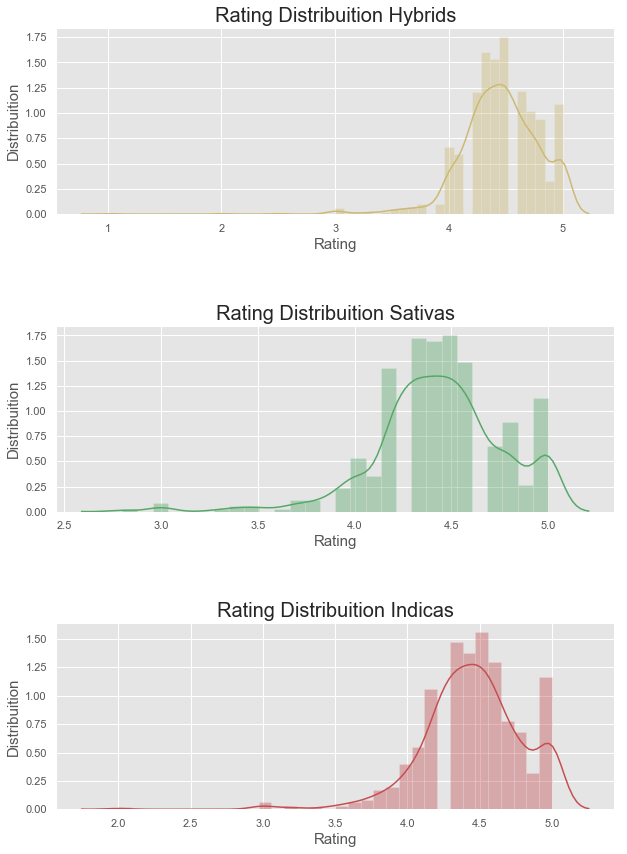

In [21]:
print("Rating Distribuition by Species Type")
print(pd.crosstab(strains[strains.Rating > 4.0]['Rating'], strains.Type))

plt.figure(figsize=(10,14))

#Let's look the Rating distribuition by Type.
g = plt.subplot(311)
g = sns.distplot(strains[(strains.Type == 'hybrid') & 
                               (strains.Rating > 0)]["Rating"], color='y')
g.set_xlabel("Rating", fontsize=15)
g.set_ylabel("Distribuition", fontsize=15)
g.set_title("Rating Distribuition Hybrids", fontsize=20)

g1 = plt.subplot(312)
g1 = sns.distplot(strains[(strains.Type == 'sativa') & 
                               (strains.Rating > 0)]["Rating"], color='g')
g1.set_xlabel("Rating", fontsize=15)
g1.set_ylabel("Distribuition", fontsize=15)
g1.set_title("Rating Distribuition Sativas", fontsize=20)

g2 = plt.subplot(313)
g2 = sns.distplot(strains[(strains.Type == 'indica') & 
                               (strains.Rating > 0)]["Rating"], color='r')
g2.set_xlabel("Rating", fontsize=15)
g2.set_ylabel("Distribuition", fontsize=15)
g2.set_title("Rating Distribuition Indicas", fontsize=20)

plt.subplots_adjust(wspace = 0.1, hspace = 0.6,top = 0.9)

plt.show()


Sativa and Indica have a similar rating distribuition, and we can see that almost of all species in dataset have rating higher than 4

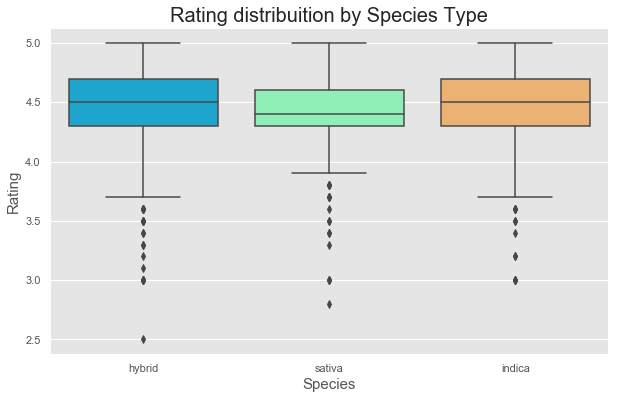

In [22]:
plt.figure(figsize=(10,6))

g = sns.boxplot(x="Type",y="Rating",data=strains[strains["Rating"] > 2],palette="rainbow")
g.set_title("Rating distribuition by Species Type", fontsize=20)
g.set_xlabel("Species", fontsize=15)
g.set_ylabel("Rating", fontsize=15)
plt.show()



Sativa have a less median than Hybrids and indicas

In [23]:
print("Rating less than 4: " + '\n')
print(strains[strains.Rating <= 4].groupby("Type")["Strain"].count() )
print( '\n' + "Rating between 4 and 4.5:" + '\n')
print(strains[(strains.Rating > 4) & (strains.Rating <= 4.5)].groupby("Type")["Strain"].count())
print('\n' + "Top Strains - Rating > 4.5: " + '\n')
print(strains[strains["Rating"] > 4.5].groupby("Type")["Strain"].count())
print('\n' + "Distribuition by type of Ratings equal 5:" + '\n')
print(strains[strains["Rating"] == 5].groupby("Type")["Strain"].count())
print("Total of: 2350 different Strains")

Rating less than 4: 

Type
hybrid    155
indica     81
sativa     57
Name: Strain, dtype: int64

Rating between 4 and 4.5:

Type
hybrid    627
indica    363
sativa    234
Name: Strain, dtype: int64

Top Strains - Rating > 4.5: 

Type
hybrid    430
indica    255
sativa    149
Name: Strain, dtype: int64

Distribuition by type of Ratings equal 5:

Type
hybrid    102
indica     70
sativa     38
Name: Strain, dtype: int64
Total of: 2350 different Strains


In [24]:
df_effect = pd.DataFrame(strains.Effects.str.split(',',4).tolist(),
             columns = ['Effect_1','Effect_2','Effect_3','Effect_4','Effect_5'])

df_flavors = pd.DataFrame(strains.Flavor.str.split(',',n=2,expand=True).values.tolist(),
                          columns = ['Flavor_1','Flavor_2','Flavor_3'])

In [25]:
strains = pd.concat([strains, df_effect], axis=1)
strains = pd.concat([strains, df_flavors], axis=1)


In [26]:
strains.head()

Strain    Type  Rating                                     Effects  \
0          100-Og  hybrid     4.0  Creative,Energetic,Tingly,Euphoric,Relaxed   
1  98-White-Widow  hybrid     4.7    Relaxed,Aroused,Creative,Happy,Energetic   
2            1024  sativa     4.4   Uplifted,Happy,Relaxed,Energetic,Creative   
3        13-Dawgs  hybrid     4.2     Tingly,Creative,Hungry,Relaxed,Uplifted   
4        24K-Gold  hybrid     4.6   Happy,Relaxed,Euphoric,Uplifted,Talkative   

                      Flavor  \
0        Earthy,Sweet,Citrus   
1      Flowery,Violet,Diesel   
2    Spicy/Herbal,Sage,Woody   
3  Apricot,Citrus,Grapefruit   
4       Citrus,Earthy,Orange   

                                         Description  Effect_1   Effect_2  \
0  $100 OG is a 50/50 hybrid strain that packs a ...  Creative  Energetic   
1  The ‘98 Aloha White Widow is an especially pot...   Relaxed    Aroused   
2  1024 is a sativa-dominant hybrid bred in Spain...  Uplifted      Happy   
3  13 Dawgs is a hybrid of G13 and Chemdawg genet...    Tingly   Creative   
4  Also known as Kosher Tangie, 24k Gold is a 60%...     Happy    Relaxed   

   Effect_3   Effect_4   Effect_5      Flavor_1 Flavor_2    Flavor_3  
0    Tingly   Euphoric    Relaxed        Earthy    Sweet      Citrus  
1  Creative      Happy  Energetic       Flowery   Violet      Diesel  
2   Relaxed  Energetic   Creative  Spicy/Herbal     Sage       Woody  
3    Hungry    Relaxed   Uplifted       Apricot   Citrus  Grapefruit  
4  Euphoric   Uplifted  Talkative        Citrus   Earthy      Orange

In [27]:
strains.columns

Index(['Strain', 'Type', 'Rating', 'Effects', 'Flavor', 'Description',
       'Effect_1', 'Effect_2', 'Effect_3', 'Effect_4', 'Effect_5', 'Flavor_1',
       'Flavor_2', 'Flavor_3'],
      dtype='object')

The top 5 First Effects related
Relaxed     825
Happy       476
Euphoric    249
Uplifted    244
Sleepy       89
Name: Effect_1, dtype: int64


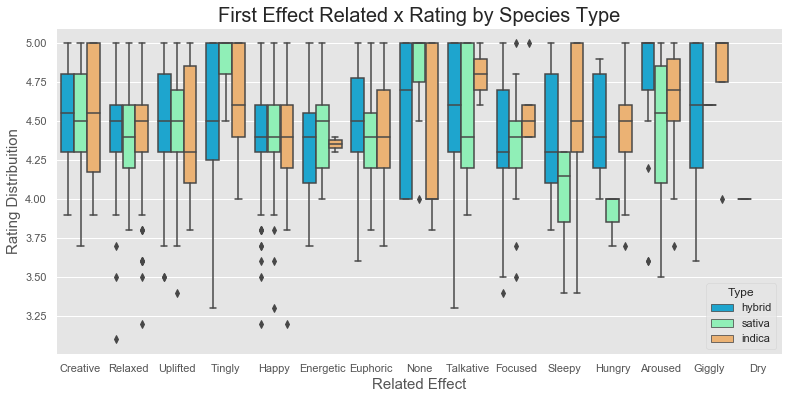

In [28]:
print("The top 5 First Effects related")
print(strains['Effect_1'].value_counts()[:5])

plt.figure(figsize=(13,6))

g = sns.boxplot(x = 'Effect_1', y="Rating",
                hue="Type",
                data=strains[strains["Rating"] > 3],
                palette="rainbow")
g.set_xlabel("Related Effect", fontsize=15)
g.set_ylabel("Rating Distribuition", fontsize=15)
g.set_title("First Effect Related x Rating by Species Type",fontsize=20)

plt.show()

The top 5 Second related Effects
Happy       571
Relaxed     351
Euphoric    342
Uplifted    321
Sleepy      197
Name: Effect_2, dtype: int64


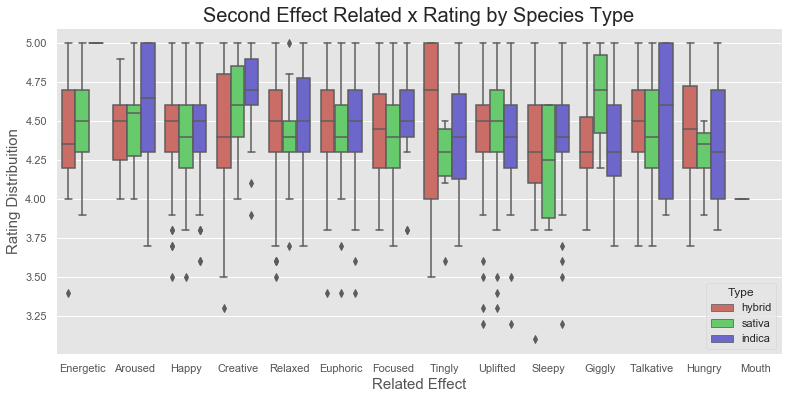

In [29]:
print("The top 5 Second related Effects")
print(strains['Effect_2'].value_counts()[:5])

plt.figure(figsize=(13,6))

g = sns.boxplot(x = 'Effect_2', y="Rating",
                hue="Type",
                data=strains[strains["Rating"] > 3],
                palette="hls")
g.set_xlabel("Related Effect", fontsize=15)
g.set_ylabel("Rating Distribuition", fontsize=15)
g.set_title("Second Effect Related x Rating by Species Type",fontsize=20)

plt.show()

TOP 10 Flavors related
Earthy          531
Sweet           414
Citrus          188
None            156
Berry           124
Diesel          108
Pungent          87
Lemon            67
Spicy/Herbal     67
Blueberry        66
Name: Flavor_1, dtype: int64


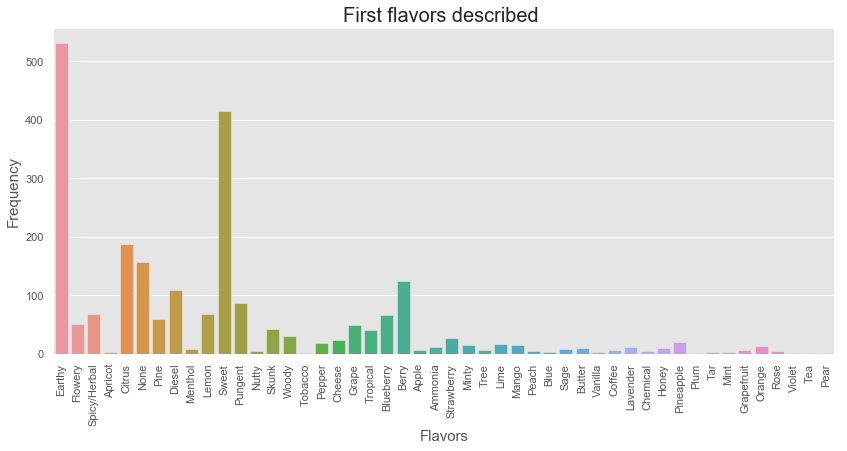

In [30]:
print("TOP 10 Flavors related")
print(strains.Flavor_1.value_counts()[:10])

plt.figure(figsize=(14,6))
sns.countplot('Flavor_1', data=strains)
plt.xticks(rotation=90)
plt.xlabel('Flavors', fontsize=15)
plt.ylabel('Frequency', fontsize=15)
plt.title("First flavors described ", fontsize=20)
plt.show()

Percentual of Species with Rating equal 5
Type
hybrid    48.57
indica    33.33
sativa    18.10
Name: Strain, dtype: float64


Text(0.5,1,'Distribuition of Types by Rating 5.0  ')

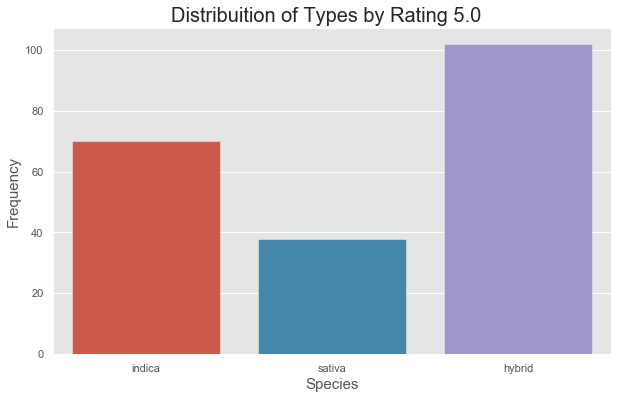

In [31]:
print("Percentual of Species with Rating equal 5")
five_rating = (strains[strains["Rating"] == 5].groupby("Type")["Strain"].count() \
               / len(strains[strains["Rating"] == 5]) *100).round(decimals=2)
print(five_rating)
plt.figure(figsize=(10,6))
g = sns.countplot(x="Type",data=strains[strains["Rating"] == 5])
g.set_xlabel('Species', fontsize=15)
g.set_ylabel('Frequency', fontsize=15)
g.set_title("Distribuition of Types by Rating 5.0  ", fontsize=20)


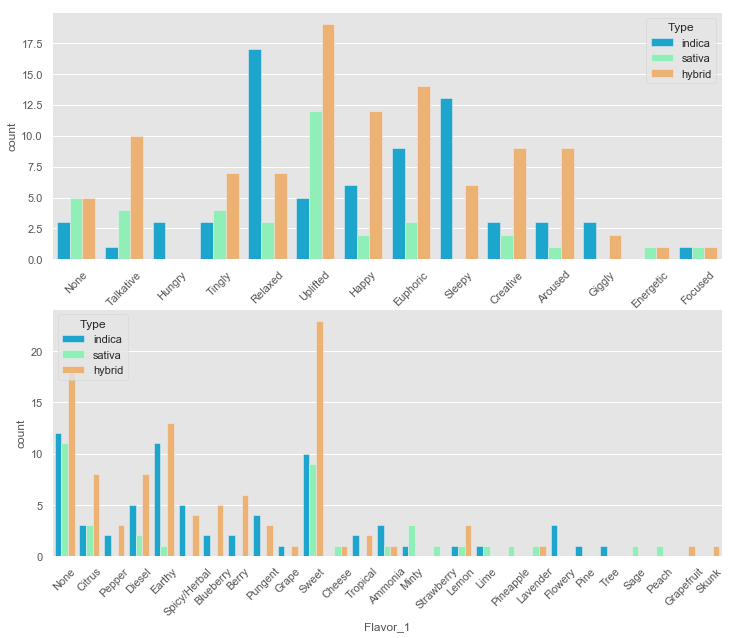

In [32]:
strains_top = strains[strains["Rating"] == 5]

fig, ax = plt.subplots(2,1, figsize=(12,10))

sns.countplot(x ='Effect_1',data = strains_top,hue="Type",ax=ax[0], palette='rainbow')

sns.countplot(x ='Flavor_1',data = strains_top,hue="Type",ax=ax[1], palette='rainbow')

for ax in fig.axes:
    plt.sca(ax)
    plt.xticks(rotation=45)

The most related flavors are Sweet and Earthly. 
Is important to remember that we have alot of another flavors that are related with this Sweet and Earthly tastes. 
We can also remember that the first cannabis strain was Skunk #1, that have a high earthly and pungent taste. 
The distribuition total of data set is almost nearly of this values: 

hybrid 51.55

indica 29.73

sativa 18.72

In [33]:
hibridas = strains[strains.Type == 'hybrid']
indicas = strains[strains.Type == 'indica']
sativas = strains[strains.Type == 'sativa']

In [34]:
del strains["Effects"]
del strains["Flavor"]

In [35]:
strains.head()

Strain    Type  Rating  \
0          100-Og  hybrid     4.0   
1  98-White-Widow  hybrid     4.7   
2            1024  sativa     4.4   
3        13-Dawgs  hybrid     4.2   
4        24K-Gold  hybrid     4.6   

                                         Description  Effect_1   Effect_2  \
0  $100 OG is a 50/50 hybrid strain that packs a ...  Creative  Energetic   
1  The ‘98 Aloha White Widow is an especially pot...   Relaxed    Aroused   
2  1024 is a sativa-dominant hybrid bred in Spain...  Uplifted      Happy   
3  13 Dawgs is a hybrid of G13 and Chemdawg genet...    Tingly   Creative   
4  Also known as Kosher Tangie, 24k Gold is a 60%...     Happy    Relaxed   

   Effect_3   Effect_4   Effect_5      Flavor_1 Flavor_2    Flavor_3  
0    Tingly   Euphoric    Relaxed        Earthy    Sweet      Citrus  
1  Creative      Happy  Energetic       Flowery   Violet      Diesel  
2   Relaxed  Energetic   Creative  Spicy/Herbal     Sage       Woody  
3    Hungry    Relaxed   Uplifted       Apricot   Citrus  Grapefruit  
4  Euphoric   Uplifted  Talkative        Citrus   Earthy      Orange

In [36]:
def get_effects(dataframe):
    ret_dict = {}
    for list_ef in dataframe.Effects:
        effects_list = list_ef.split(',')
        for effect in effects_list:
            if not effect in ret_dict:
                ret_dict[effect] = 1
            else:
                ret_dict[effect] += 1
    return ret_dict

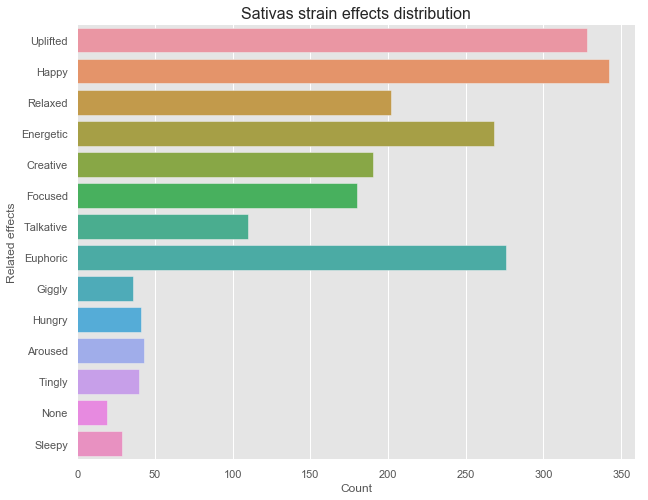

In [37]:
sativa_effects = get_effects(sativas)

plt.figure(figsize=(10,8))
sns.barplot(list(sativa_effects.values()), list(sativa_effects.keys()), orient='h')
plt.xlabel("Count", fontsize=12)
plt.ylabel("Related effects", fontsize=12)
plt.title("Sativas strain effects distribution", fontsize=16)
plt.show()

In [38]:
sativa_effects

{'Uplifted': 328,
 'Happy': 342,
 'Relaxed': 202,
 'Energetic': 268,
 'Creative': 190,
 'Focused': 180,
 'Talkative': 110,
 'Euphoric': 276,
 'Giggly': 36,
 'Hungry': 41,
 'Aroused': 43,
 'Tingly': 40,
 'None': 19,
 'Sleepy': 29}

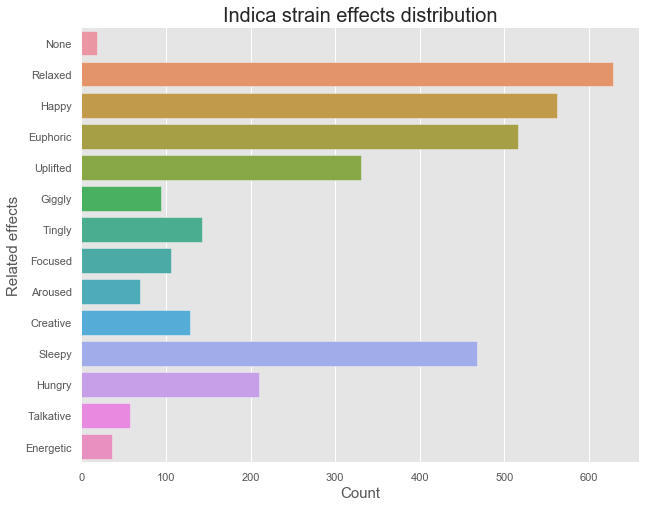

In [39]:
indica_effects = get_effects(indicas)

plt.figure(figsize=(10,8))
sns.barplot(list(indica_effects.values()),list(indica_effects.keys()), orient='h')
plt.xlabel("Count", fontsize=15)
plt.ylabel("Related effects", fontsize=15)
plt.title("Indica strain effects distribution", fontsize=20)
plt.show()

In [40]:
indica_effects

{'None': 19,
 'Relaxed': 628,
 'Happy': 562,
 'Euphoric': 516,
 'Uplifted': 331,
 'Giggly': 94,
 'Tingly': 143,
 'Focused': 106,
 'Aroused': 69,
 'Creative': 128,
 'Sleepy': 468,
 'Hungry': 210,
 'Talkative': 58,
 'Energetic': 36}

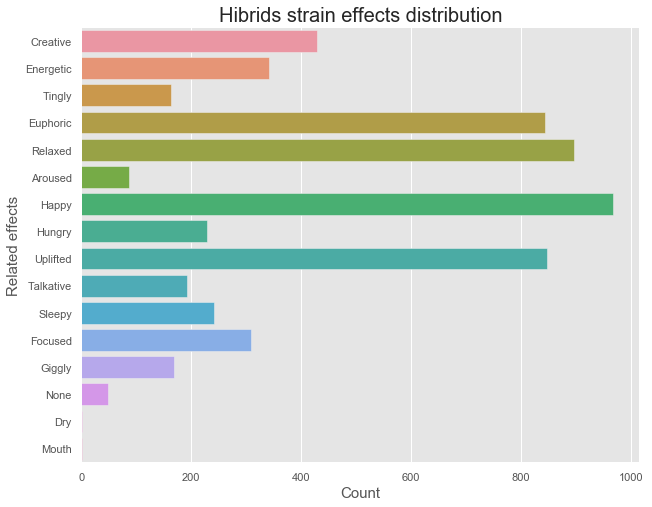

In [41]:
hibridas_effects = get_effects(hibridas)

plt.figure(figsize=(10,8))
sns.barplot(list(hibridas_effects.values()),list(hibridas_effects.keys()), orient='h')
plt.xlabel("Count", fontsize=15)
plt.ylabel("Related effects", fontsize=15)
plt.title("Hibrids strain effects distribution", fontsize=20)
plt.show()

In [42]:
hibridas_effects

{'Creative': 429,
 'Energetic': 342,
 'Tingly': 163,
 'Euphoric': 843,
 'Relaxed': 896,
 'Aroused': 87,
 'Happy': 967,
 'Hungry': 228,
 'Uplifted': 848,
 'Talkative': 192,
 'Sleepy': 241,
 'Focused': 309,
 'Giggly': 168,
 'None': 49,
 'Dry': 1,
 'Mouth': 1}

We can clearly see that Happy, Uplified, Relaxed, Euphoric have a high ranking at all 3 types 

Its interesting that almost 350 people of 440 in Sativas related Happy and Uplifted Effects 

'Happy': 342

'Uplifted': 328

'Euphoric': 276

'Energetic': 268

78% has described Happy to Sativas strains

Indicas we have 699 votes and Relaxed with most frequency at distribuition: 

'Relaxed': 628

'Happy': 562

'Euphoric': 516

90% has described Relaxed to Indica strains 

Hybrids We have 1212 votes and distribuition of effects is

'Happy': 967

'Relaxed': 896

'Uplifted': 848

'Euphoric': 843

80% has described Happy and 74% related Relaxed to Hybrids strains 
Very Interesting!

We also need to remember that's possible to vote in more than 1 effect or flavor in each vote.

In [43]:
def flavors(df):
    ret_dict = {}
    for list_ef in df.Flavor.dropna():
        flavors_list = list_ef.split(',')
        for flavor in flavors_list:
            if not flavor in ret_dict:
                ret_dict[flavor] = 1
            else:
                ret_dict[flavor] += 1
    return ret_dict

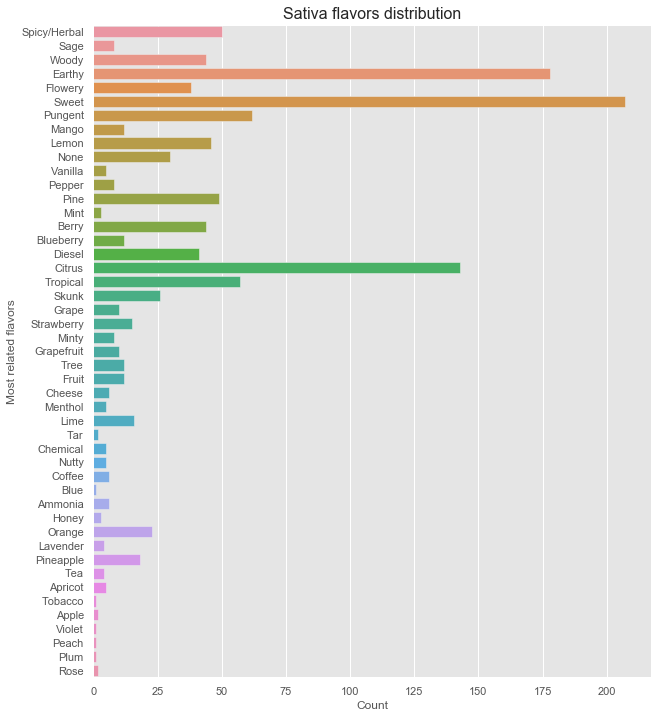

In [44]:
sativa_flavors = flavors(sativas)

plt.figure(figsize=(10,12))
sns.barplot(list(sativa_flavors.values()),list(sativa_flavors.keys()), orient='h')
plt.xlabel("Count", fontsize=12)
plt.ylabel("Most related flavors", fontsize=12)
plt.title("Sativa flavors distribution", fontsize=16)
plt.show()

In [45]:
sativa_flavors

{'Spicy/Herbal': 50,
 'Sage': 8,
 'Woody': 44,
 'Earthy': 178,
 'Flowery': 38,
 'Sweet': 207,
 'Pungent': 62,
 'Mango': 12,
 'Lemon': 46,
 'None': 30,
 'Vanilla': 5,
 'Pepper': 8,
 'Pine': 49,
 'Mint': 3,
 'Berry': 44,
 'Blueberry': 12,
 'Diesel': 41,
 'Citrus': 143,
 'Tropical': 57,
 'Skunk': 26,
 'Grape': 10,
 'Strawberry': 15,
 'Minty': 8,
 'Grapefruit': 10,
 'Tree': 12,
 'Fruit': 12,
 'Cheese': 6,
 'Menthol': 5,
 'Lime': 16,
 'Tar': 2,
 'Chemical': 5,
 'Nutty': 5,
 'Coffee': 6,
 'Blue': 1,
 'Ammonia': 6,
 'Honey': 3,
 'Orange': 23,
 'Lavender': 4,
 'Pineapple': 18,
 'Tea': 4,
 'Apricot': 5,
 'Tobacco': 1,
 'Apple': 2,
 'Violet': 1,
 'Peach': 1,
 'Plum': 1,
 'Rose': 2}

Most frequent flavors in Sativas: 

Sweet: 207 

Earthy: 178 

Citrus: 143 

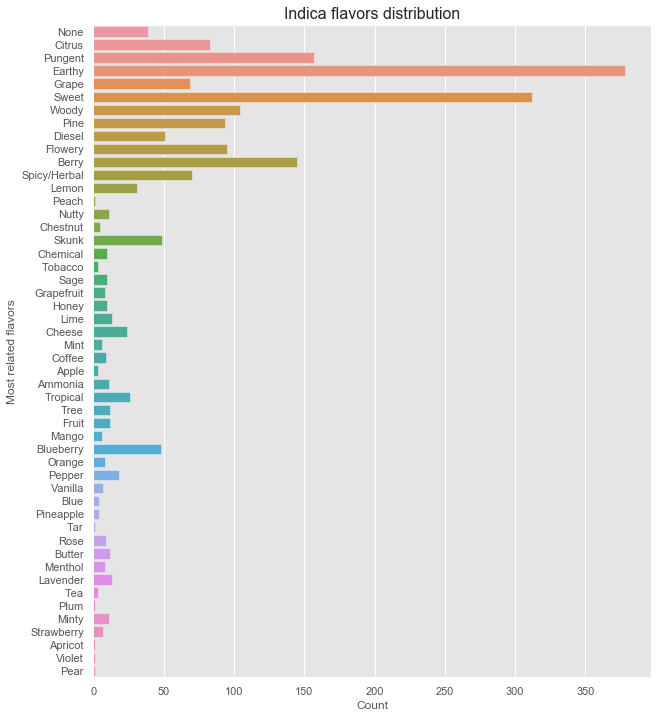

In [46]:
indica_flavors = flavors(indicas)

plt.figure(figsize=(10,12))
sns.barplot(list(indica_flavors.values()),list(indica_flavors.keys()), orient='h')
plt.xlabel("Count", fontsize=12)
plt.ylabel("Most related flavors",fontsize=12)
plt.title("Indica flavors distribution", fontsize=16)
plt.show()

In [47]:
indica_flavors

{'None': 39,
 'Citrus': 83,
 'Pungent': 157,
 'Earthy': 378,
 'Grape': 69,
 'Sweet': 312,
 'Woody': 104,
 'Pine': 94,
 'Diesel': 51,
 'Flowery': 95,
 'Berry': 145,
 'Spicy/Herbal': 70,
 'Lemon': 31,
 'Peach': 1,
 'Nutty': 11,
 'Chestnut': 5,
 'Skunk': 49,
 'Chemical': 10,
 'Tobacco': 3,
 'Sage': 10,
 'Grapefruit': 8,
 'Honey': 10,
 'Lime': 13,
 'Cheese': 24,
 'Mint': 6,
 'Coffee': 9,
 'Apple': 3,
 'Ammonia': 11,
 'Tropical': 26,
 'Tree': 12,
 'Fruit': 12,
 'Mango': 6,
 'Blueberry': 48,
 'Orange': 8,
 'Pepper': 18,
 'Vanilla': 7,
 'Blue': 4,
 'Pineapple': 4,
 'Tar': 1,
 'Rose': 9,
 'Butter': 12,
 'Menthol': 8,
 'Lavender': 13,
 'Tea': 3,
 'Plum': 1,
 'Minty': 11,
 'Strawberry': 7,
 'Apricot': 1,
 'Violet': 1,
 'Pear': 1}

Most frequent values in indicas 

Earthy: 378 
    
Sweet: 312 
    
Pungent: 157 
    
Berry: 145

Text(0.5,1,'Hibrids flavors distribution')

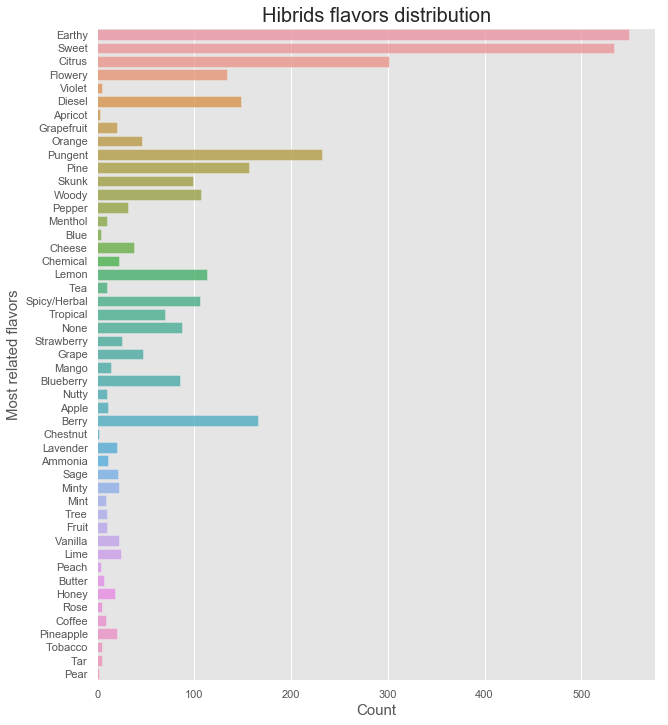

In [48]:
hibridas_flavors = flavors(hibridas)

plt.figure(figsize=(10,12))
sns.barplot(list(hibridas_flavors.values()),list(hibridas_flavors.keys()), alpha=0.8,orient='h')
plt.xlabel("Count", fontsize=15)
plt.ylabel("Most related flavors", fontsize=15)
plt.title("Hibrids flavors distribution", fontsize=20)

In [49]:
hibridas_flavors

{'Earthy': 549,
 'Sweet': 534,
 'Citrus': 301,
 'Flowery': 134,
 'Violet': 5,
 'Diesel': 148,
 'Apricot': 3,
 'Grapefruit': 20,
 'Orange': 46,
 'Pungent': 232,
 'Pine': 157,
 'Skunk': 99,
 'Woody': 107,
 'Pepper': 32,
 'Menthol': 10,
 'Blue': 4,
 'Cheese': 38,
 'Chemical': 22,
 'Lemon': 113,
 'Tea': 10,
 'Spicy/Herbal': 106,
 'Tropical': 70,
 'None': 87,
 'Strawberry': 25,
 'Grape': 47,
 'Mango': 14,
 'Blueberry': 85,
 'Nutty': 10,
 'Apple': 11,
 'Berry': 166,
 'Chestnut': 2,
 'Lavender': 20,
 'Ammonia': 11,
 'Sage': 21,
 'Minty': 22,
 'Mint': 9,
 'Tree': 10,
 'Fruit': 10,
 'Vanilla': 22,
 'Lime': 24,
 'Peach': 4,
 'Butter': 7,
 'Honey': 18,
 'Rose': 5,
 'Coffee': 9,
 'Pineapple': 20,
 'Tobacco': 5,
 'Tar': 5,
 'Pear': 2}

The most frequent values in Hybrid type is: 
    
Earthy: 549
    
Sweet: 534
    
Citrus: 301 

In [50]:
from wordcloud import WordCloud, STOPWORDS
import nltk.tokenize as word_tokenize
import re
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
import string
import re
from nltk.stem.porter import *
from nltk.tokenize import sent_tokenize
from sklearn.feature_extraction import stop_words

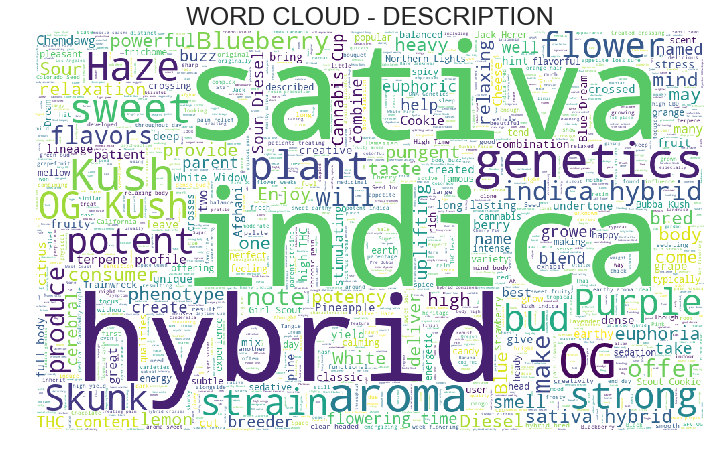

In [51]:
stopwords1 = set(STOPWORDS)
newStopWords1 = ['strain','effect', 'genetic', 'effects','flavor',
                'dominant','known','cross']
stopwords1.update(newStopWords1)

wordcloud1 = WordCloud(
                          background_color='white',
                          stopwords=stopwords1,
                          max_words=1500,
                          max_font_size=200, 
                          width=1000, height=600,
                          random_state=42,
                         ).generate(" ".join(strains['Description'].astype(str)))

fig = plt.figure(figsize = (12,12))
plt.imshow(wordcloud1)
plt.title("WORD CLOUD - DESCRIPTION", fontsize=25)
plt.axis('off')
plt.show()

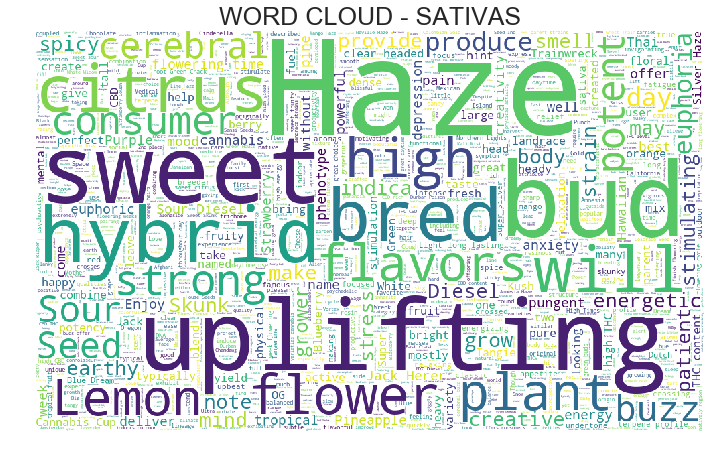

In [52]:
stopwords2 = set(STOPWORDS)
newStopWords2 = ['strain','effect', 'genetic', 'sativa', 'effects',
                'aroma','flavor','dominant','known','cross','genetics']
stopwords2.update(newStopWords2)

wordcloud2 = WordCloud(
                          background_color='white',
                          stopwords=stopwords2,
                          max_words=1500,
                          max_font_size=200, 
                          width=1000, height=600,
                          random_state=42,
                         ).generate(" ".join(strains[strains.Type == 'sativa']['Description'].astype(str)))

fig = plt.figure(figsize = (12,12))
plt.imshow(wordcloud2)
plt.title("WORD CLOUD - SATIVAS", fontsize=25)
plt.axis('off')
plt.show()

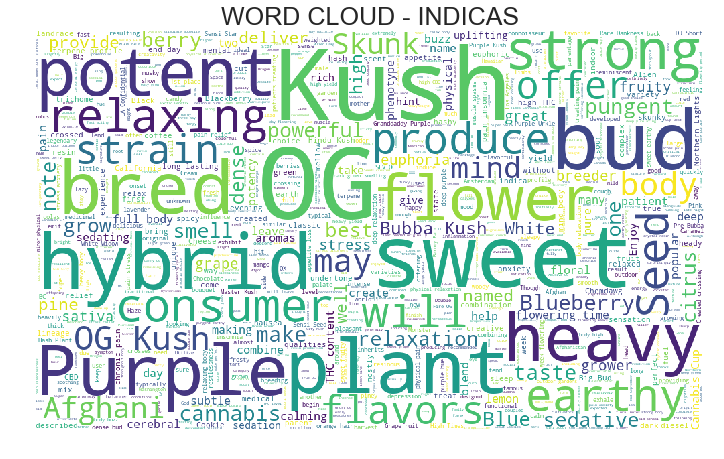

In [53]:
stopwords3 = set(STOPWORDS)
newStopWords3 = ['strain','effect', 'genetic', 'indica', 'effects','aroma', 
                'genetics','flavor','dominant','known','cross']
stopwords3.update(newStopWords3)

wordcloud3 = WordCloud(
                          background_color='white',
                          stopwords=stopwords3,
                          max_words=1500,
                          max_font_size=150, 
                          width=1000, height=600,
                          random_state=42,
                         ).generate(" ".join(strains[strains.Type == 'indica']['Description'].astype(str)))

fig = plt.figure(figsize = (12,12))
plt.imshow(wordcloud3)
plt.title("WORD CLOUD - INDICAS", fontsize=25)
plt.axis('off')
plt.show()

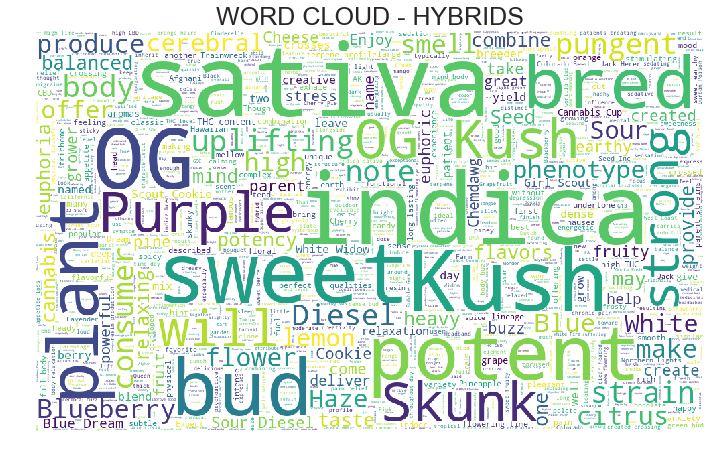

In [54]:
stopwords4 = set(STOPWORDS)
newStopWords4 = ['strain','effect', 'genetic', 'hybrid', 'effects', 'aroma',
                'genetics', 'flavor', 'genetics','cross','dominant','known']
stopwords4.update(newStopWords4)

wordcloud4 = WordCloud(
                          background_color='white',
                          stopwords=stopwords4,
                          max_words=1500,
                          max_font_size=150, 
                          width=1000, height=600,
                          random_state=42,
                         ).generate(" ".join(strains[strains.Type == 'hybrid']['Description'].astype(str)))

fig = plt.figure(figsize = (12,12))
plt.imshow(wordcloud4)
plt.title("WORD CLOUD - HYBRIDS", fontsize=25)
plt.axis('off')
plt.show()

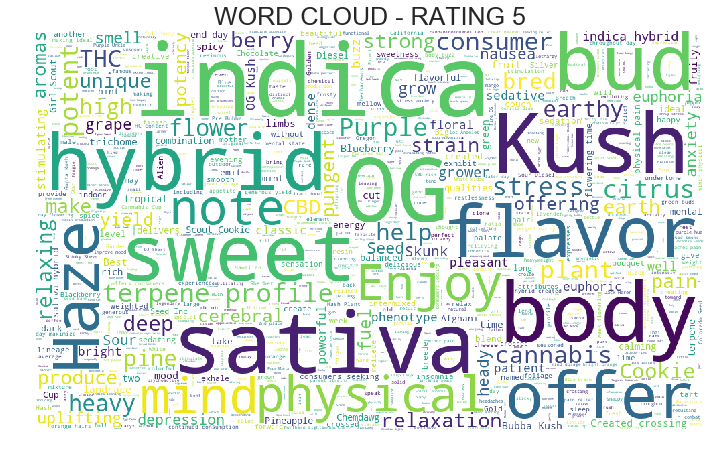

In [55]:
stopwords5 = set(STOPWORDS)
newStopWords5 = ['strain','effect', 'genetic','effects','cross','genetics',
                'aroma','consumer','known','dominant']
stopwords5.update(newStopWords5)

wordcloud5 = WordCloud(
                          background_color='white',
                          stopwords=stopwords5,
                          max_words=1500,
                          max_font_size=150, 
                          width=1000, height=600,
                          random_state=42,
                         ).generate(" ".join(strains[strains.Rating == 5]['Description'].astype(str)))

fig = plt.figure(figsize = (12,12))
plt.imshow(wordcloud5)
plt.title("WORD CLOUD - RATING 5", fontsize=25)
plt.axis('off')
plt.show()

In [56]:
strains["Type"] = pd.factorize(strains["Type"])[0]
del strains["Description"]


In [57]:
strains["Type"]

0       0
1       0
2       1
3       0
4       0
5       2
6       0
7       2
8       1
9       2
10      0
11      0
12      2
13      0
14      2
15      2
16      2
17      2
18      2
19      2
20      0
21      0
22      0
23      0
24      0
25      0
26      2
27      1
28      2
29      2
30      1
31      0
32      1
33      0
34      2
35      1
36      0
37      2
38      0
39      2
40      2
41      2
42      0
43      2
44      2
45      2
46      0
47      2
48      2
49      2
50      2
51      2
52      0
53      1
54      1
55      0
56      0
57      0
58      0
59      2
60      0
61      1
62      0
63      1
64      1
65      0
66      0
67      0
68      1
69      0
70      0
71      0
72      2
73      2
74      1
75      0
76      0
77      2
78      0
79      0
80      2
81      0
82      0
83      1
84      2
85      2
86      2
87      1
88      2
89      1
90      0
91      0
92      0
93      1
94      1
95      1
96      0
97      0
98      2
99      0


In [58]:
dummy = pd.get_dummies(strains[['Effect_1','Effect_2','Effect_3','Effect_4','Effect_5','Flavor_1','Flavor_2','Flavor_3']])

In [59]:
strains = pd.concat([strains, dummy], axis=1)

strains = strains.drop(['Strain','Effect_1','Effect_2','Effect_3','Effect_4','Effect_5','Flavor_1','Flavor_2','Flavor_3'], axis=1)

strains.shape

(2351, 232)

# Machine Learning Model

In [60]:
#Importing the auxiliar and preprocessing library
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.pipeline import Pipeline


from sklearn.model_selection import train_test_split, KFold, cross_validate
from sklearn.metrics import accuracy_score

#Models
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.svm import SVC
from sklearn.linear_model import RidgeClassifier, LogisticRegression
from sklearn.svm import SVC, LinearSVC
from sklearn.tree import DecisionTreeClassifier
from xgboost import XGBClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.feature_selection import SelectFromModel
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, ExtraTreesClassifier, BaggingClassifier, VotingClassifier, RandomTreesEmbedding



In [61]:
X = strains.drop("Type",1)
y = strains["Type"]
feature_name = X.columns.tolist()
X = X.astype(np.float64, copy=False)
y = y.astype(np.float64, copy=False)

In [62]:
feature_name

['Rating',
 'Effect_1_Aroused',
 'Effect_1_Creative',
 'Effect_1_Dry',
 'Effect_1_Energetic',
 'Effect_1_Euphoric',
 'Effect_1_Focused',
 'Effect_1_Giggly',
 'Effect_1_Happy',
 'Effect_1_Hungry',
 'Effect_1_None',
 'Effect_1_Relaxed',
 'Effect_1_Sleepy',
 'Effect_1_Talkative',
 'Effect_1_Tingly',
 'Effect_1_Uplifted',
 'Effect_2_Aroused',
 'Effect_2_Creative',
 'Effect_2_Energetic',
 'Effect_2_Euphoric',
 'Effect_2_Focused',
 'Effect_2_Giggly',
 'Effect_2_Happy',
 'Effect_2_Hungry',
 'Effect_2_Mouth',
 'Effect_2_Relaxed',
 'Effect_2_Sleepy',
 'Effect_2_Talkative',
 'Effect_2_Tingly',
 'Effect_2_Uplifted',
 'Effect_3_Aroused',
 'Effect_3_Creative',
 'Effect_3_Energetic',
 'Effect_3_Euphoric',
 'Effect_3_Focused',
 'Effect_3_Giggly',
 'Effect_3_Happy',
 'Effect_3_Hungry',
 'Effect_3_Relaxed',
 'Effect_3_Sleepy',
 'Effect_3_Talkative',
 'Effect_3_Tingly',
 'Effect_3_Uplifted',
 'Effect_4_Aroused',
 'Effect_4_Creative',
 'Effect_4_Energetic',
 'Effect_4_Euphoric',
 'Effect_4_Focused',
 'Ef

In [63]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state=42)

print("X_train Shape: ", X_train.shape)
print("X_test Shape: ", X_test.shape)

X_train Shape:  (1645, 231)
X_test Shape:  (706, 231)


# Feature Selection


In [64]:
thresh = 5 * 10**(-3)
model = GradientBoostingClassifier()
model.fit(X_train, y_train)
#select features using threshold
selection = SelectFromModel(model, threshold=thresh, prefit=True)

X_important_train = selection.transform(X_train)
X_important_test = selection.transform(X_test)

In [65]:
print("X_important_train Shape: ", X_important_train.shape)
print("X_important_test Shape: ", X_important_test.shape)

X_important_train Shape:  (1645, 42)
X_important_test Shape:  (706, 42)


LogReg: 0.634633 (+/- 0.035558)
XGBClassifier: 0.618831 (+/- 0.026570)
DecisionTreeClassifier: 0.512460 (+/- 0.034696)
RandomForestClassifier: 0.569600 (+/- 0.025177)
GradientBoostingClassifier: 0.631578 (+/- 0.029342)


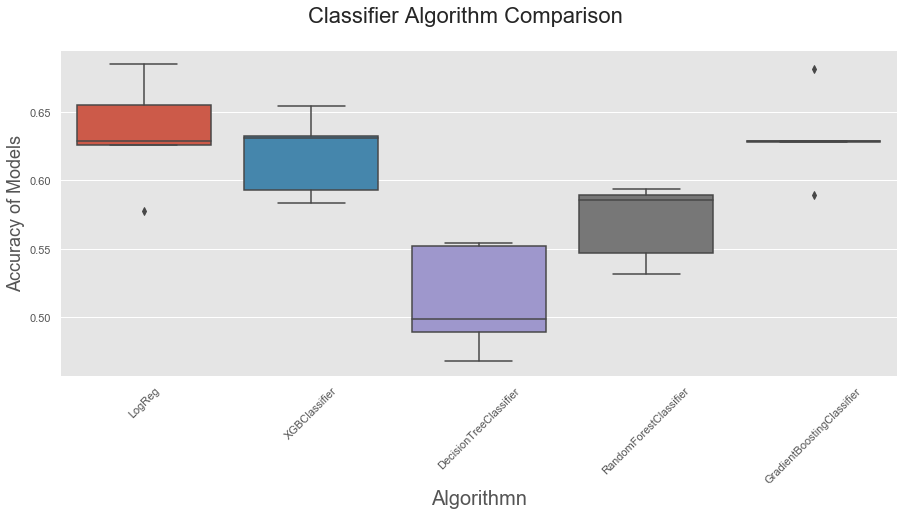

In [66]:
clfs = []
seed = 3

clfs.append(("LogReg", 
             Pipeline([("Scaler", StandardScaler()),
                       ("LogReg", LogisticRegression())])))

clfs.append(("XGBClassifier",
             Pipeline([("Scaler", StandardScaler()),
                       ("XGB", XGBClassifier())]))) 

clfs.append(("DecisionTreeClassifier", 
             Pipeline([("Scaler", StandardScaler()),
                       ("DecisionTrees", DecisionTreeClassifier())]))) 

clfs.append(("RandomForestClassifier", 
             Pipeline([("Scaler", StandardScaler()),
                       ("RandomForest", RandomForestClassifier())]))) 

clfs.append(("GradientBoostingClassifier", 
             Pipeline([("Scaler", StandardScaler()),
                       ("GradientBoosting", GradientBoostingClassifier(max_features=15, n_estimators=150))]))) 


#'neg_mean_absolute_error', 'neg_mean_squared_error','r2'
scoring = 'accuracy'
n_folds = 7

results, names  = [], [] 

for name, model  in clfs:
    kfold = KFold(n_splits=n_folds, random_state=seed)
    cv_results = cross_val_score(model, X_important_train, y_train, cv= 5, scoring=scoring, n_jobs=-1)    
    names.append(name)
    results.append(cv_results)    
    msg = "%s: %f (+/- %f)" % (name, cv_results.mean(),  cv_results.std())
    print(msg)
    
# boxplot algorithm comparison
fig = plt.figure(figsize=(15,6))
fig.suptitle('Classifier Algorithm Comparison', fontsize=22)
ax = fig.add_subplot(111)
sns.boxplot(x=names, y=results)
ax.set_xticklabels(names)
ax.set_xlabel("Algorithmn", fontsize=20)
ax.set_ylabel("Accuracy of Models", fontsize=18)
ax.set_xticklabels(ax.get_xticklabels(),rotation=45)
plt.show()

In [67]:
# param_xgb = {
# #  'n_estimators':[90,100,110],
# #  'max_depth':[2,3,4],
#  'min_child_weight':[2,4,7],
#  'colsample_bytree':[0.3,0.6,0.8],
#  'colsample_bylevel':[0.2,0.6,0.8]
# }

In [68]:
# from sklearn.model_selection import GridSearchCV
# from xgboost import XGBClassifier

# xgb = XGBClassifier()

# xgb_model = GridSearchCV(estimator = xgb,
# #                          max_depth = 3, 
# #                          n_estimators = 100,
#                         param_grid = param_xgb, 
#                         scoring='accuracy',
#                         cv=2,
#                         verbose = 1)

# xgb_model.fit(X_important_train, y_train)